In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/DataSet/Watera1.csv')
df.head()

,Unnamed: 0,ph,hardness,tds,chlorine,sulfate,conductivity,organic_carbon,trihalomethanes,turbidity
0,0,7.14,440.98,614.26,2.12,208.39,350.920,7.22,17.32,2.23
1,1,6.41,242.82,387.89,3.93,313.10,153.360,9.92,20.69,2.07
2,2,6.29,133.09,225.55,1.46,332.04,1420.430,8.76,32.87,5.05
3,3,7.39,71.89,459.23,0.56,609.63,4288.385,9.62,42.80,2.26
4,4,6.31,273.01,308.99,0.64,52.59,196.850,1.05,133.38,5.30


In [4]:
df.drop(['Unnamed: 0'],axis=1,inplace=True)

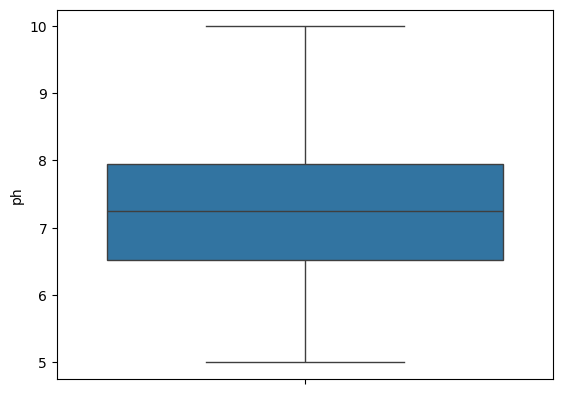

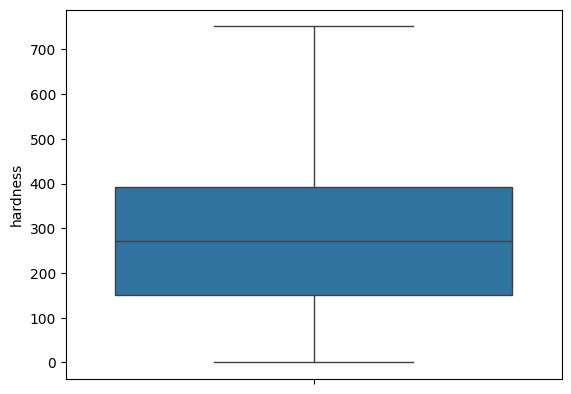

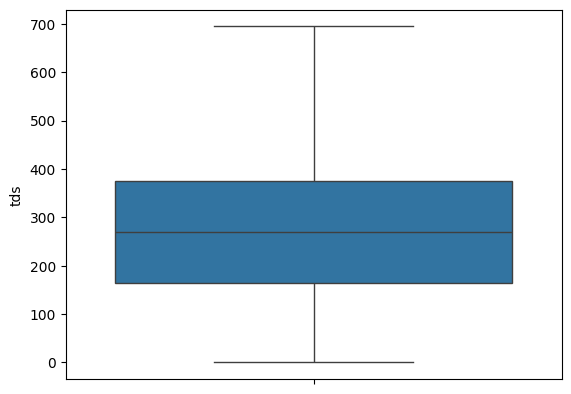

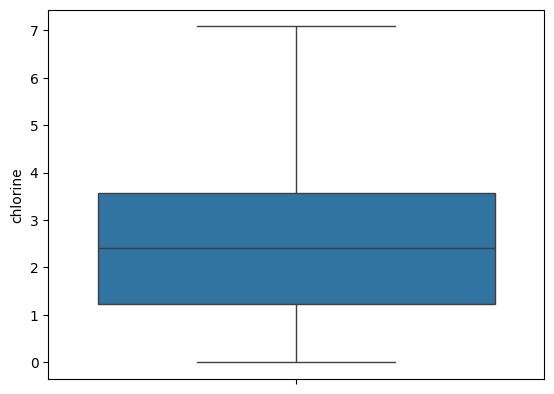

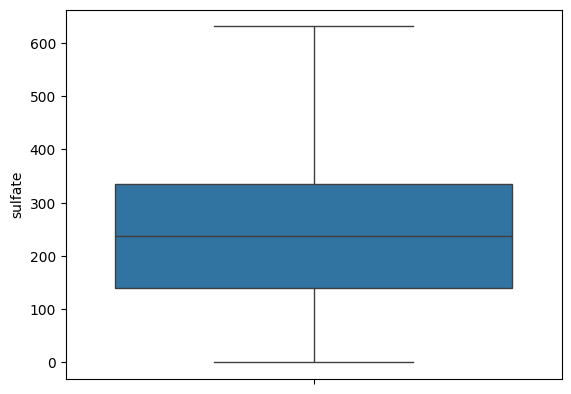

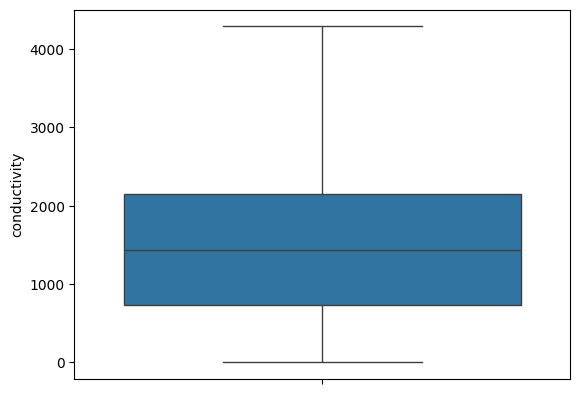

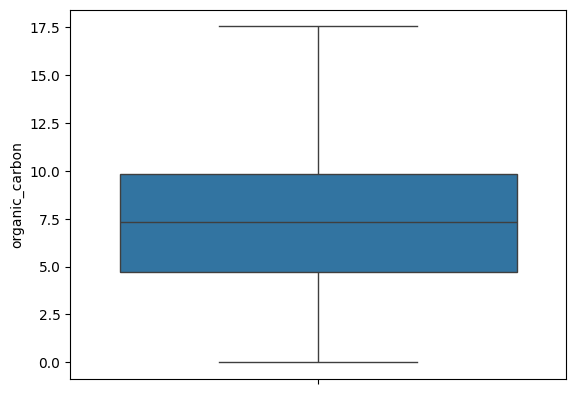

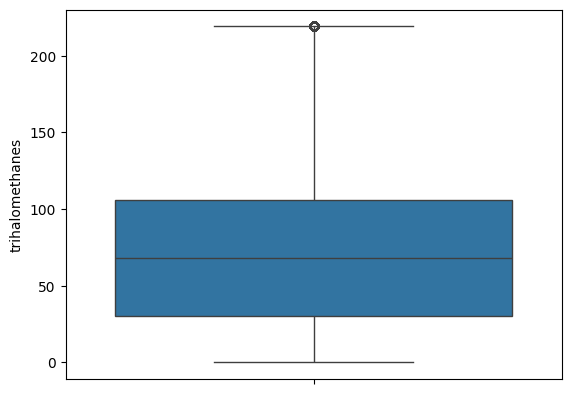

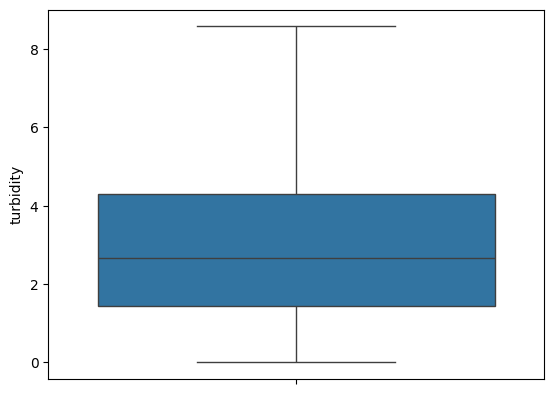

In [5]:
for i in df.columns:
  sns.boxplot(data=df[i])
  plt.show()

* Based on the above analysis, the outliers are retained since they reflect real and valid data points, as previously explained.

# Duplicate
* When the whole row appears again, it is called a duplicate.

In [6]:
# it return number of duplicates
df.duplicated().sum()

np.int64(0)

In [7]:
# if any duplicates presented drop it like below
df.drop_duplicates(inplace=True)

# Feature Scaling(Numerical Columns)

* For feature scaling of numerical columns, we use Scikit-learn (sklearn).
# SK-learn(scikit-learn)
* SK-learn is popular python library for ML
* It provides simple and Efficient tool for datra analysuis and modeling, bulit top of Numpy,pandas and scipy

 # Types Of Feature Scaling
 * Standard Scalar - Scales features so they have a mean of 0 and a standard deviation of 1.
 * Min-Max Scalar - Transforms features to a fixed range, usually between 0 and 1.
 * Robust Scalar - Scales features using the median and interquartile range, making it robust to outliers.

# RobustScaler

In [8]:
from sklearn.preprocessing import StandardScaler
standardscaler = StandardScaler()
df_standard = pd.DataFrame(standardscaler.fit_transform(df),columns=df.columns)
df_standard.head()

,ph,hardness,tds,chlorine,sulfate,conductivity,organic_carbon,trihalomethanes,turbidity
0,-0.111768,0.757912,1.631155,-0.232307,-0.288593,-1.216090,0.006262,-1.102148,-0.390174
1,-0.856702,-0.287246,0.433689,0.935095,0.444793,-1.428574,0.776431,-1.035065,-0.469185
2,-0.979157,-0.865997,-0.425067,-0.657989,0.577448,-0.065784,0.445544,-0.792610,1.002395
3,0.143346,-1.188785,0.811068,-1.238465,2.521683,3.018830,0.690857,-0.594944,-0.375360
4,-0.958748,-0.128015,0.016319,-1.186868,-1.379813,-1.381799,-1.753718,1.208138,1.125850


In [9]:
from sklearn.preprocessing import MinMaxScaler
minmaxscaler = MinMaxScaler()
df_minmax = pd.DataFrame(minmaxscaler.fit_transform(df),columns=df.columns)
df_minmax.head()

,ph,hardness,tds,chlorine,sulfate,conductivity,organic_carbon,trihalomethanes,turbidity
0,0.428858,0.586690,0.884136,0.299435,0.330156,0.081822,0.411748,0.078995,0.260058
1,0.282565,0.323054,0.558294,0.555085,0.496050,0.035753,0.565726,0.094366,0.241399
2,0.258517,0.177066,0.324618,0.206215,0.526057,0.331221,0.499572,0.149918,0.588921
3,0.478958,0.095644,0.660982,0.079096,0.965848,1.000000,0.548617,0.195208,0.263557
4,0.262525,0.363219,0.444724,0.090395,0.083319,0.045894,0.059880,0.608336,0.618076


In [10]:
from sklearn.preprocessing import RobustScaler
scalar=RobustScaler()
df_Robust = pd.DataFrame(scalar.fit_transform(df), columns=df.columns) # All columns are numerical, so the full dataset was considered.
df_Robust.head()

,ph,hardness,tds,chlorine,sulfate,conductivity,organic_carbon,trihalomethanes,turbidity
0,-0.076923,0.707799,1.618385,-0.123932,-0.145495,-0.763335,-0.015595,-0.669595,-0.150877
1,-0.587413,-0.117730,0.553728,0.649573,0.386075,-0.901987,0.510721,-0.625078,-0.207018
2,-0.671329,-0.574863,-0.209785,-0.405983,0.482226,-0.012728,0.284600,-0.464185,0.838596
3,0.097902,-0.829820,0.889252,-0.790598,1.891437,2.000070,0.452242,-0.333014,-0.140351
4,-0.657343,0.008040,0.182648,-0.756410,-0.936428,-0.871465,-1.218324,0.863512,0.926316
